In [75]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from joblib import Parallel, delayed

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime


#one year window from now
#end = datetime.now()
#start = datetime(end.year-1, end.month, end.day)

end = datetime.now()
start = datetime(2022, 12, end.day)

sp500url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500df = pd.read_html(sp500url)[0]
tickers = sp500df['Symbol'].tolist()


def get_data(stock_name):
    stock = yf.download(stock_name, start, end, interval = '5m', repair=True)
    stock_df = pd.DataFrame(stock)#.reset_index()
    #stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
    stock_df['Company Name'] = stock_name
    return stock_df

data = Parallel(n_jobs=-1,verbose=1)(delayed(get_data)(stock_name) for stock_name in tickers)
df = pd.concat(data)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed:   40.5s finished


In [76]:
df

,Open,High,Low,Close,Adj Close,Volume,Company Name
2022-12-19 09:30:00-05:00,121.330002,122.059998,121.160004,122.059998,122.059998,108478.0,MMM
2022-12-19 09:35:00-05:00,122.150002,122.620003,121.989998,122.330002,122.330002,61525.0,MMM
2022-12-19 09:40:00-05:00,122.329300,122.330002,122.110001,122.305000,122.305000,26870.0,MMM
2022-12-19 09:45:00-05:00,122.260002,122.580002,122.220001,122.504997,122.504997,39644.0,MMM
2022-12-19 09:50:00-05:00,122.550003,122.900002,122.529999,122.709999,122.709999,22509.0,MMM
...,...,...,...,...,...,...,...
2023-01-17 15:40:00-05:00,159.529999,159.606705,159.179993,159.179993,159.179993,49452.0,ZTS
2023-01-17 15:45:00-05:00,159.139999,159.490005,159.085007,159.490005,159.490005,76387.0,ZTS
2023-01-17 15:50:00-05:00,159.470001,159.559998,159.014999,159.139999,159.139999,126521.0,ZTS
2023-01-17 15:55:00-05:00,159.110001,159.539993,159.089996,159.539993,159.539993,198031.0,ZTS


Text(0.5, 1.0, 'Closing Price')

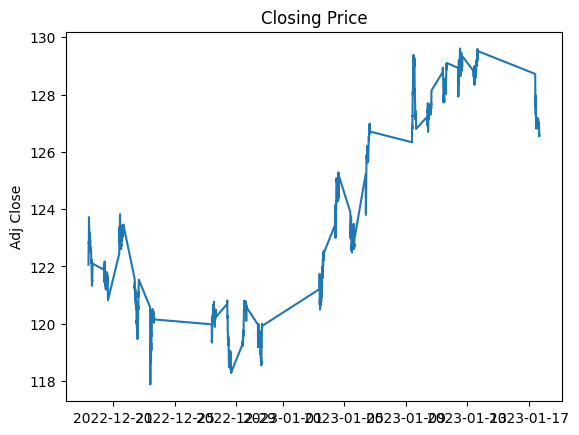

In [78]:
# PLOT
company = df[df['Company Name'] == 'MMM']
plt.plot(company.index, company["Adj Close"])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price")

In [79]:
def calculate_price_change(df,company_name):
    company_data = df[df['Company Name'] == company_name]
    percentages_list = {'Date':[],'Company Name':[],'Price Change':[]}
    for i,date in enumerate(company_data.index):
        if i==0:
            percentages_list['Date'].append(date)
            percentages_list['Company Name'].append(company_name)
            percentages_list['Price Change'].append(0)

        else:
            pct_change = (company_data['Adj Close'][i] - company_data['Adj Close'][i-1])/company_data['Adj Close'][i-1] *100
            percentages_list['Date'].append(date)
            percentages_list['Company Name'].append(company_name)
            percentages_list['Price Change'].append(pct_change)
    return pd.DataFrame(percentages_list)

                          Date Company Name  Price Change
0    2022-12-19 09:30:00-05:00          MMM      0.000000
1    2022-12-19 09:35:00-05:00          MMM      0.221206
2    2022-12-19 09:40:00-05:00          MMM     -0.020438
3    2022-12-19 09:45:00-05:00          MMM      0.163523
4    2022-12-19 09:50:00-05:00          MMM      0.167342
...                        ...          ...           ...
1478 2023-01-17 15:40:00-05:00          MMM     -0.003942
1479 2023-01-17 15:45:00-05:00          MMM     -0.031556
1480 2023-01-17 15:50:00-05:00          MMM     -0.142046
1481 2023-01-17 15:55:00-05:00          MMM      0.047414
1482 2023-01-17 16:00:00-05:00          MMM      0.000000

[1483 rows x 3 columns]


Text(0.5, 1.0, 'Price Variation')

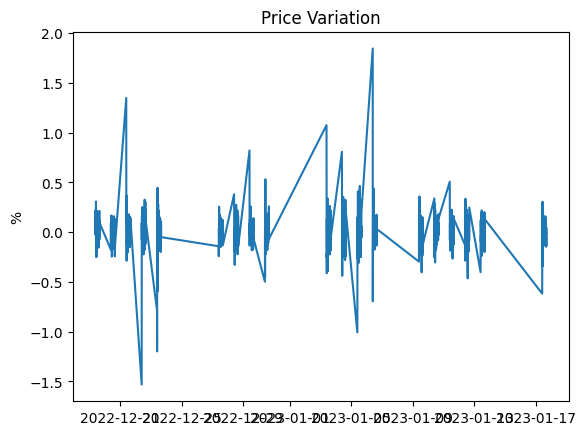

In [80]:
# PLOT
company = df[df['Company Name'] == 'MMM']
price_changes_df = calculate_price_change(df,'MMM')
print(price_changes_df)
plt.plot(price_changes_df['Date'], price_changes_df['Price Change'])
plt.ylabel('%')
plt.xlabel(None)
plt.title(f"Price Variation")

In [81]:
price_change_data = Parallel(n_jobs=-1,verbose=1)(delayed(calculate_price_change)(df,stock_name) for stock_name in tickers)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 472 out of 503 | elapsed:    4.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed:    4.8s finished


In [82]:
price_change_df = pd.concat(price_change_data)
price_change_df

,Date,Company Name,Price Change
0,2022-12-19 09:30:00-05:00,MMM,0.000000
1,2022-12-19 09:35:00-05:00,MMM,0.221206
2,2022-12-19 09:40:00-05:00,MMM,-0.020438
3,2022-12-19 09:45:00-05:00,MMM,0.163523
4,2022-12-19 09:50:00-05:00,MMM,0.167342
...,...,...,...
1478,2023-01-17 15:40:00-05:00,ZTS,-0.206885
1479,2023-01-17 15:45:00-05:00,ZTS,0.194756
1480,2023-01-17 15:50:00-05:00,ZTS,-0.219453
1481,2023-01-17 15:55:00-05:00,ZTS,0.251347


In [83]:
df_pivot = price_change_df.pivot(index ='Date',columns='Company Name')
df_pivot

Price Change                                \
Company Name                         A       AAL      AAPL      ABBV   
Date                                                                   
2022-12-19 09:30:00-05:00     0.000000  0.000000  0.000000  0.000000   
2022-12-19 09:35:00-05:00    -0.084711  0.625488  0.268637  0.216578   
2022-12-19 09:40:00-05:00    -0.084783 -0.776226 -0.208447 -0.475458   
2022-12-19 09:45:00-05:00    -0.461607 -0.000777 -0.551793 -0.254367   
2022-12-19 09:50:00-05:00     0.231874  0.039148 -0.013205  0.205263   
...                                ...       ...       ...       ...   
2023-01-17 15:40:00-05:00    -0.032144 -0.292650 -0.080972 -0.078443   
2023-01-17 15:45:00-05:00    -0.077162 -0.176112  0.021291  0.019624   
2023-01-17 15:50:00-05:00    -0.138359  0.323436  0.008171 -0.104636   
2023-01-17 15:55:00-05:00     0.177215  0.117236  0.125201  0.085105   
2023-01-17 16:00:00-05:00    -0.032167  0.000000 -0.007352 -0.026162   

                                                                             \
Company Name                    ABC       ABT      ACGL       ACN      ADBE   
Date                                                                          
2022-12-19 09:30:00-05:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-12-19 09:35:00-05:00  0.451104 -0.258667  0.244171 -0.341697  0.524540   
2022-12-19 09:40:00-05:00 -0.333094  0.132025 -0.146342 -0.007713  0.199147   
2022-12-19 09:45:00-05:00 -0.226787 -0.009420 -0.439669 -0.152182 -0.191383   
2022-12-19 09:50:00-05:00 -0.089720  0.065932  0.000000  0.289402  0.094394   
...                             ...       ...       ...       ...       ...   
2023-01-17 15:40:00-05:00  0.204279 -0.123181  0.078136  0.042029 -0.102787   
2023-01-17 15:45:00-05:00 -0.079112 -0.017615  0.000000 -0.063011 -0.223891   
2023-01-17 15:50:00-05:00 -0.249698 -0.044056 -0.062462 -0.164612 -0.211327   
2023-01-17 15:55:00-05:00  0.177061 -0.052885  0.046873 -0.045597  0.247433   
2023-01-17 16:00:00-05:00  0.048758  0.000000 -0.046851 -0.014042  0.000000   

                                     ...                                \
Company Name                    ADI  ...       WRK        WY      WYNN   
Date                                 ...                                 
2022-12-19 09:30:00-05:00  0.000000  ...  0.000000  0.000000  0.000000   
2022-12-19 09:35:00-05:00  0.102046  ...  0.198919  0.477864 -0.487684   
2022-12-19 09:40:00-05:00 -0.509709  ... -0.269420 -0.095119 -0.908441   
2022-12-19 09:45:00-05:00 -0.313426  ... -0.142185 -0.380834 -0.386007   
2022-12-19 09:50:00-05:00  0.096743  ...  0.014231  0.000000  0.115041   
...                             ...  ...       ...       ...       ...   
2023-01-17 15:40:00-05:00 -0.047963  ...  0.040500 -0.094505 -0.219216   
2023-01-17 15:45:00-05:00 -0.047986  ...  0.080947 -0.094595 -0.107300   
2023-01-17 15:50:00-05:00  0.084013  ... -0.053924 -0.142023  0.107415   
2023-01-17 15:55:00-05:00  0.203859  ...  0.040462  0.189638  0.183937   
2023-01-17 16:00:00-05:00 -0.125653  ...  0.040446  0.031540 -0.030599   

                                                                             \
Company Name                    XEL       XOM      XRAY       YUM       ZBH   
Date                                                                          
2022-12-19 09:30:00-05:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-12-19 09:35:00-05:00  0.092834 -0.018920  0.156040 -0.038599 -0.063802   
2022-12-19 09:40:00-05:00 -0.028532 -0.061491 -0.352604 -0.137063 -0.367089   
2022-12-19 09:45:00-05:00 -0.192681  0.009944 -0.032911 -0.326716 -0.256307   
2022-12-19 09:50:00-05:00  0.014303 -0.308077  0.164634  0.027145  0.096365   
...                             ...       ...       ...       ...       ...   
2023-01-17 15:40:00-05:00  0.021108 -0.006637 -0.108521 -0.053810 -0.004070   
2023-01-17 15:45:00-05:00 -0.014062 -0.046461 -0.027155 -0.130738 -0.077252   
2023

In [84]:
 #reset symbol as index (rather than 0-X)
corr_df = df_pivot.corr(method='pearson')
corr_df

Price Change                                \
Company Name                         A       AAL      AAPL      ABBV   
             Company Name                                              
Price Change A                1.000000  0.319163  0.482522  0.169528   
             AAL              0.319163  1.000000  0.379878 -0.110925   
             AAPL             0.482522  0.379878  1.000000  0.310431   
             ABBV             0.169528 -0.110925  0.310431  1.000000   
             ABC              0.241099  0.137335  0.268904  0.290541   
...                                ...       ...       ...       ...   
             XRAY             0.428734  0.336464  0.293612  0.073528   
             YUM              0.411019  0.299547  0.485583  0.261224   
             ZBH              0.349784  0.265356  0.363122  0.181940   
             ZION             0.431162  0.494286  0.405094  0.154637   
             ZTS              0.663994  0.288363  0.545599  0.268991   

                                                                             \
Company Name                    ABC       ABT      ACGL       ACN      ADBE   
             Company Name                                                     
Price Change A             0.241099  0.586814  0.284910  0.601537  0.567722   
             AAL           0.137335  0.151961  0.186282  0.477890  0.393024   
             AAPL          0.268904  0.538923  0.212454  0.613737  0.677621   
             ABBV          0.290541  0.368699  0.255360  0.166633  0.211851   
             ABC           1.000000  0.339733  0.396562  0.342346  0.181287   
...                             ...       ...       ...       ...       ...   
             XRAY          0.140599  0.404841  0.224484  0.438462  0.372084   
             YUM           0.301277  0.477160  0.375563  0.526848  0.465363   
             ZBH           0.215142  0.446387  0.246447  0.407140  0.415049   
             ZION          0.275696  0.303885  0.399709  0.505278  0.411987   
             ZTS           0.268935  0.667746  0.245011  0.605737  0.584257   

                                     ...                                \
Company Name                    ADI  ...       WRK        WY      WYNN   
             Company Name            ...                                 
Price Change A             0.518234  ...  0.455226  0.461668  0.343514   
             AAL           0.492956  ...  0.471289  0.416131  0.353791   
             AAPL          0.706157  ...  0.507690  0.519776  0.262612   
             ABBV          0.247396  ...  0.185631  0.277050  0.066779   
             ABC           0.252690  ...  0.263475  0.314163  0.078103   
...                             ...  ...       ...       ...       ...   
             XRAY          0.397506  ...  0.434361  0.405886  0.341121   
             YUM           0.448157  ...  0.496761  0.487493  0.290202   
             ZBH           0.426115  ...  0.326765  0.291571  0.234248   
             ZION          0.483731  ...  0.564488  0.598252  0.299840   
             ZTS           0.557293  ...  0.470103  0.491438  0.283988   

                                                                             \
Company Name                    XEL       XOM      XRAY       YUM       ZBH   
             Company Name                                                     
Price Change A             0.348863  0.222265  0.428734  0.411019  0.349784   
             AAL           0.250061  0.185759  0.336464  0.299547  0.265356   
             AAPL          0.445281  0.256899  0.293612  0.485583  0.363122   
             ABBV          0.343822  0.080468  0.073528  0.261224  0.181940   
             ABC           0.374255  0.320093  0.140599  0.301277  0.215142   
...                             ...       ...       ...       ...       ...   
             XRAY          0.328475  0.096548  1.000000  0.351209  0.340355   
             YUM           0.481680  0.206674  0.351209  1.000000  0.291169   
    

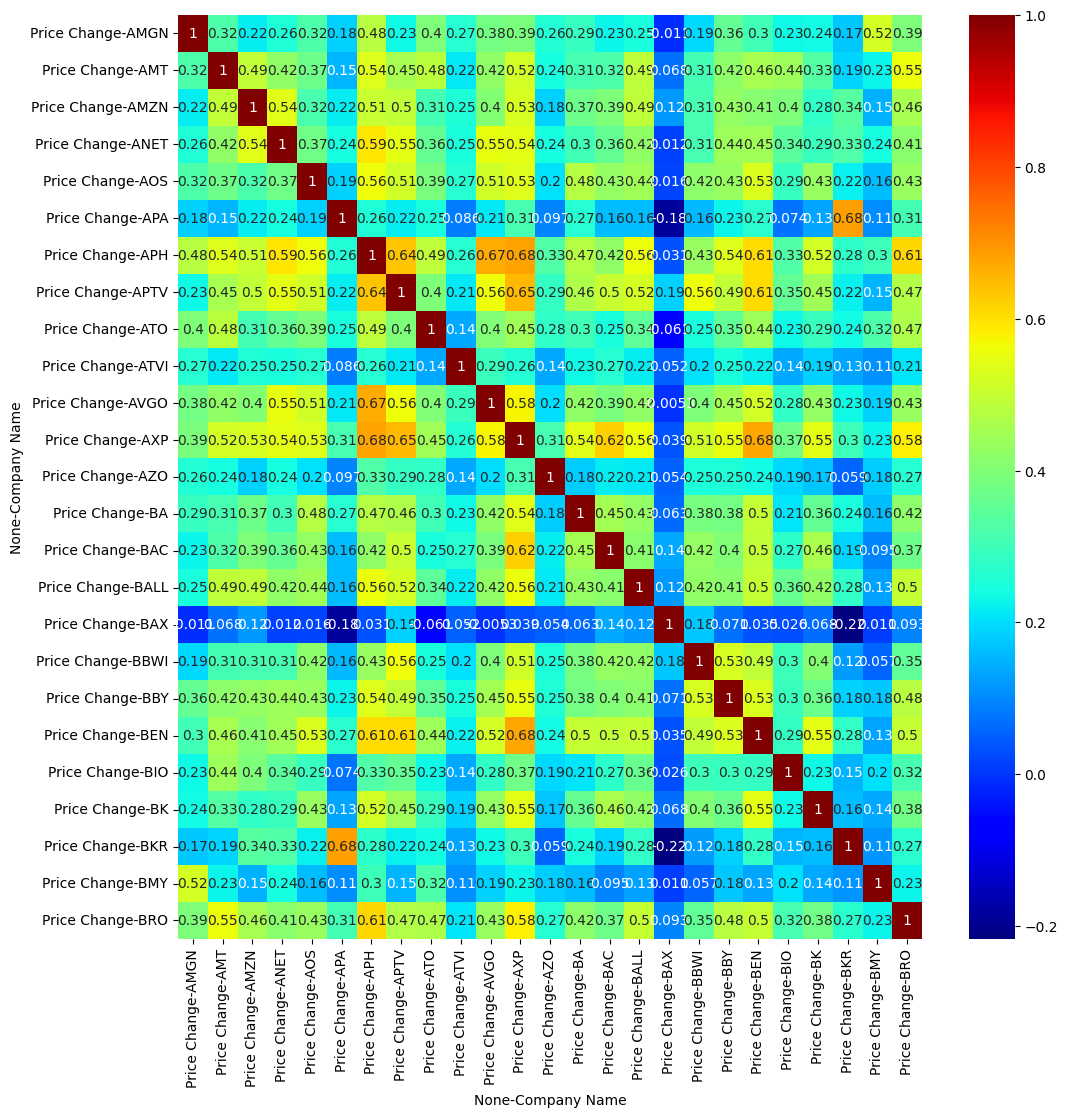

In [85]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(corr_df.iloc[25:50, 25:50], annot=True, cmap='jet')
#plt.matshow(corr_df.iloc[0:25, 0:25])
plt.show()

In [86]:
corr_array = corr_df.to_numpy()
mask = np.ones_like(corr_df)
mask[np.triu_indices_from(mask)] = False
corr_array = corr_array*mask
max_idx = np.dstack(np.unravel_index(np.argsort(corr_array.ravel(),), corr_array.shape))[0]
print(max_idx)


[[376 228]
 [333 228]
 [376  54]
 ...
 [224  22]
 [149 148]
 [164 163]]


In [89]:
index = max_idx[-3]
print(corr_df.iloc[index[0], index[1]])
print(corr_df.columns[index[0]])
print(corr_df.index[index[1]])

0.9015267893303957
('Price Change', 'LRCX')
('Price Change', 'AMAT')


Text(0.5, 1.0, 'Price Variation')

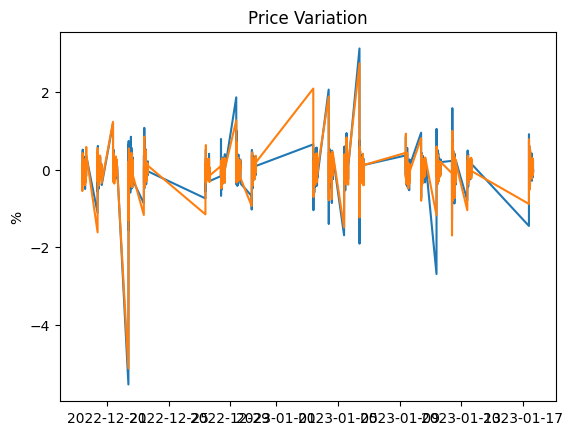

In [90]:
# PLOT
price_changes_eqr = calculate_price_change(df,'LRCX')
price_changes_avb = calculate_price_change(df,'AMAT')
plt.plot(price_changes_eqr['Date'], price_changes_eqr['Price Change'])
plt.plot(price_changes_avb['Date'], price_changes_avb['Price Change'])

plt.ylabel('%')
plt.xlabel(None)
plt.title(f"Price Variation")